In [6]:
import numpy as np
import pandas as pd
from datetime import datetime

# These data are taken from another notebook
hs = [1, 2, 3, 4]
GA = [2326618, 694978, 50163, 50164]
CE = [762160, 735490, 714048, 696072]
CC = [781313, 1333212, 1855028, 2406565]
RA = [27202, 53865, 75315, 93293]
R = [20.48, 43.22, 46.21, 35.24]
df = pd.DataFrame(hs, columns=['Heures Stockage'])
df['Coûts ajustement globaux'] = GA
df['Coûts énergétiques'] = CE
df['Coûts capital'] = CC
df["Revenus d'arbitrage"] = RA
df['Rendement'] = R
df

,Heures Stockage,Coûts ajustement globaux,Coûts énergétiques,Coûts capital,Revenus d'arbitrage,Rendement
0,1,2326618,762160,781313,27202,20.48
1,2,694978,735490,1333212,53865,43.22
2,3,50163,714048,1855028,75315,46.21
3,4,50164,696072,2406565,93293,35.24


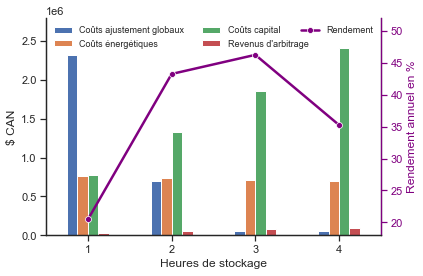

In [8]:
# Plot minimization costs results
with sns.axes_style("ticks", {"grid.color": "white"}):
    fig, ax1 = plt.subplots()
    df[["Coûts ajustement globaux", "Coûts énergétiques", "Coûts capital", "Revenus d'arbitrage"]].plot(kind='bar', ax=ax1)
    plt.legend(loc='upper left', ncol=2, fontsize=9, frameon=False)
    plt.ylabel('$ CAN')
    #plt.ylabel('VAE annuelle $')
    ax1.set_ylim(0, 2800000) 
    ax2 = ax1.twinx()
    sns.lineplot(data=df,x=df.index, y='Rendement', marker='o', markersize=6, linewidth=2.5,
                 color='purple',legend='full',label='Rendement',ax=ax2)
    ax2.legend(loc='upper right', fontsize=9, frameon=False)
    ax2.tick_params(axis='y', colors='purple')
    ax2.spines["right"].set_color('purple')
    sns.despine(top=True, right=False)
    ax2.set_ylim(18, 52)
    plt.ylabel("Rendement annuel en %", color='purple')
    plt.xticks(df.index, list(range(1,5)))
    ax1.tick_params(rotation=0)
    ax1.set_xlabel("Heures de stockage")
    plt.savefig('Min_Coûts', dpi=1200, bbox_inches='tight')

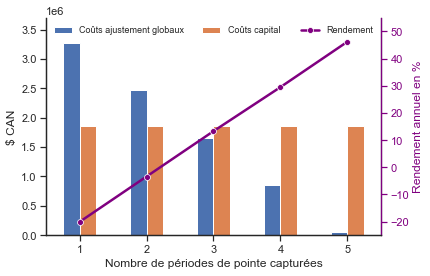

In [9]:
## Sensitivity analysis to missing peak demand periods on storage profitability and avoided GA costs
####################################################################################################
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline  
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
sns.set() # Use seaborn style

# These numbers taken from the optimization results obtained in TEST_2019 notebook
captured = [1,2,3,4,5]
GA = [3275582, 2463284, 1650987, 862538,50163]
CC = [1855027, 1855027, 1855027, 1855027, 1855027]
R = [-20.09 , -3.4, 13.29, 29.49,46.21]

df = pd.DataFrame(captured, columns=['Périodes de pointe capturées'])
df['Coûts ajustement globaux'] = GA
df['Coûts capital'] = CC
df['Rendement'] = R

with sns.axes_style("ticks", {"grid.color": "white"}):
    
    fig, ax1 = plt.subplots()
    df[["Coûts ajustement globaux", "Coûts capital"]].plot(kind='bar', ax=ax1)
    plt.legend(loc='upper left', ncol=2, fontsize=9, frameon=False)
    plt.ylabel('$ CAN')
    #plt.ylabel('VAE annuelle $')
    ax1.set_ylim(0, 3700000) 
    ax2 = ax1.twinx()
    sns.lineplot(data=df,x=df.index, y='Rendement', marker='o', markersize=6, linewidth=2.5,
                 color='purple',legend='full',label='Rendement',ax=ax2)
    ax2.legend(loc='upper right', fontsize=9, frameon=False)
    ax2.tick_params(axis='y', colors='purple')
    ax2.spines["right"].set_color('purple')
    sns.despine(top=True, right=False)
    ax2.set_ylim(-25, 55)
    plt.ylabel("Rendement annuel en %", color='purple')
    plt.xticks(df.index, list(range(1,6)))
    ax1.tick_params(rotation=0)
    ax1.set_xlabel("Nombre de périodes de pointe capturées")
    plt.savefig('Peaks_captured', dpi=1200, bbox_inches='tight')